In [42]:
# Sheet 05 ICA, Infomax
# group: nonames2

#install.packages("audio")

library(audio)
library(ggplot2)

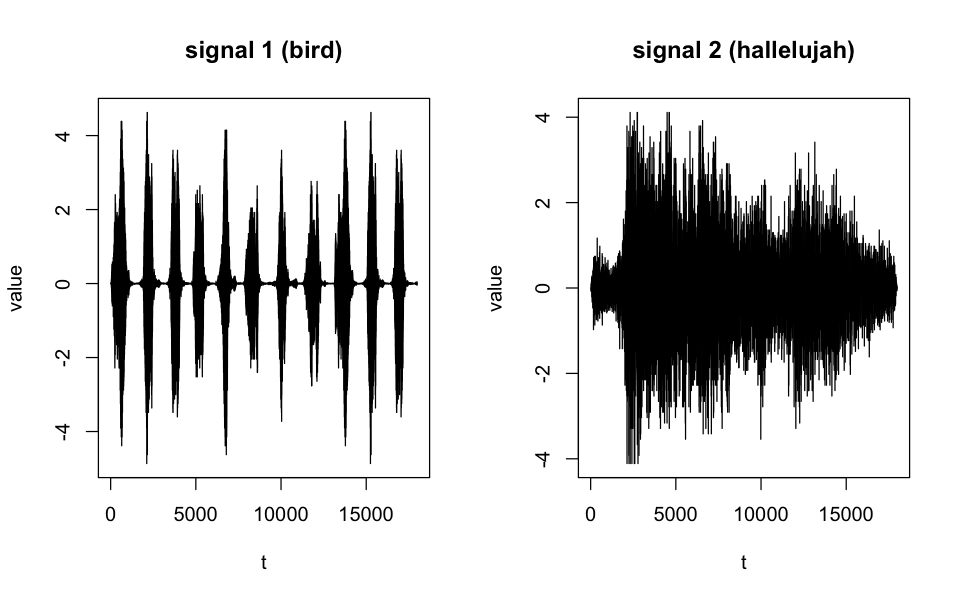

In [43]:
# Ex. 1 -------------------------------------------------------------------

# a)

s1 = read.table("sound1.dat", header=FALSE)
s2 = read.table("sound2.dat", header=FALSE)

S = t(as.matrix(data.frame(s1,s2)))

options(repr.plot.width=8, repr.plot.height=5)
par(mfrow = c(1,2))
plot(1:18000, s1$V1, type = 'l', main = 'signal 1 (bird)', xlab = 't', ylab = 'value')
plot(1:18000, s2$V1, type = 'l', main = 'signal 2 (hallelujah)', xlab = 't', ylab = 'value')
par(mfrow = c(1,1))

In [44]:
# b)

set.seed(1234)
A = matrix(runif(4, 0, 1), nrow = 2)

X = A%*%S

#play(audioSample(t(as.matrix(X[1,])), rate = 8192))
play(audioSample(t(as.matrix(X[2,])), rate = 8192))

In [45]:
# c)

X_perm = X[,sample(ncol(X))]

#play(audioSample(t(as.matrix(X_perm[1,])), rate = 8192))
play(audioSample(t(as.matrix(X_perm[2,])), rate = 8192))

In [46]:
# d)

cor(t(S), t(X))

V1,0.1845960,0.7068310
V1.1,0.9830464,0.7082728


In [47]:
# e)

X[1,] = X[1,] - mean(X[1,])
X[2,] = X[2,] - mean(X[2,])

round(rowMeans(X), 8)

[1] 0 0

In [48]:
# f)

set.seed(123)
W1 = matrix(runif(4, 0, 1), ncol = 2)

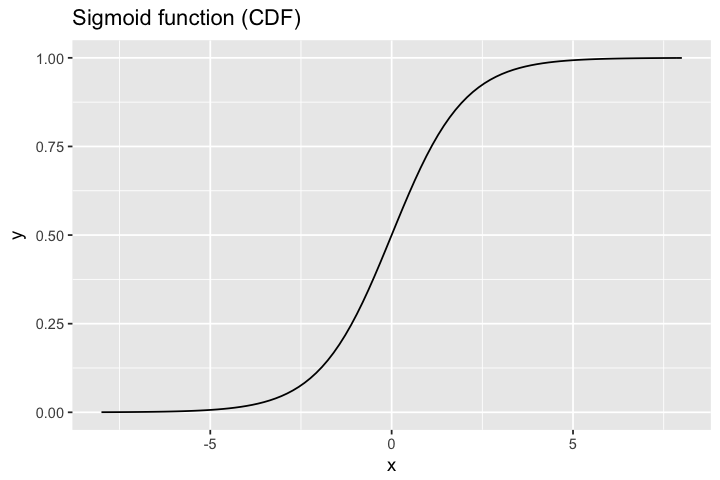

In [49]:
# Ex. 2 -------------------------------------------------------------------

# logistic function
f = function(x){
    return(1/(1+exp(-x)))
}

options(repr.plot.width=6, repr.plot.height=4)

ggplot(data.frame(x = c(-8, 8)), aes(x)) + 
    stat_function(fun = f) + 
    ggtitle("Sigmoid function (CDF)")



In [50]:
# a)

unmixing_regular = function(W, X, n_steps = 18000){
    for(t in 1:n_steps){
        eta_t = eta_zero/t
        
        x = X[,alpha]
        
        W_inv = t(solve(W))
        
        f_wx = 1 - 2*f(W%*%cbind(x,x))
        
        W_delta = eta_t*(W_inv + f_wx*t(cbind(x,x)))
        
        W = W + W_delta
        
        alpha = alpha + 1
        if(alpha == n_steps){
            alpha = 1
        }
    }
    return(W)
}


In [51]:
# b)

unmixing_natural = function(W, X, n_steps = 18000){
    
    for(t in 1:n_steps){
        eta_t = eta_zero/t
        
        x = X[,alpha]
        
        f_wx = 1 - 2*f(W%*%cbind(x,x))
        
        wx = W%*%cbind(x,x)
        
        k_delta = matrix(c(1,0,0,1), ncol = 2)
        
        
        W_delta = eta_t*((k_delta + f_wx%*%wx)%*%W)
        
        W = W + W_delta
        
        alpha = alpha + 1
        if(alpha == n_steps){
            alpha = 1
        }
    }
    return(W)
}


In [52]:
t = 1
eta_zero = .5
alpha = 1
set.seed(123)
W1 = matrix(runif(4, 0, 1), ncol = 2)

W_regular = unmixing_regular(W1, X)

S_hat = W_regular%*%X


t = 1
eta_zero = 0.33
alpha = 1
set.seed(9991)
W2 = matrix(runif(4, 0, 1), ncol = 2)

W_natural = unmixing_natural(W2, X)

S_hat_natural = W_natural%*%X

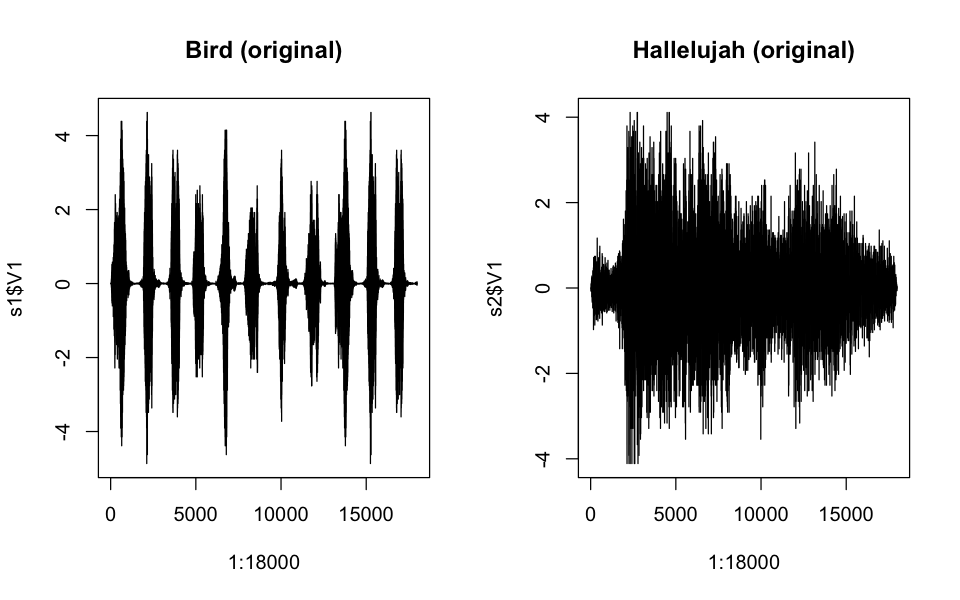

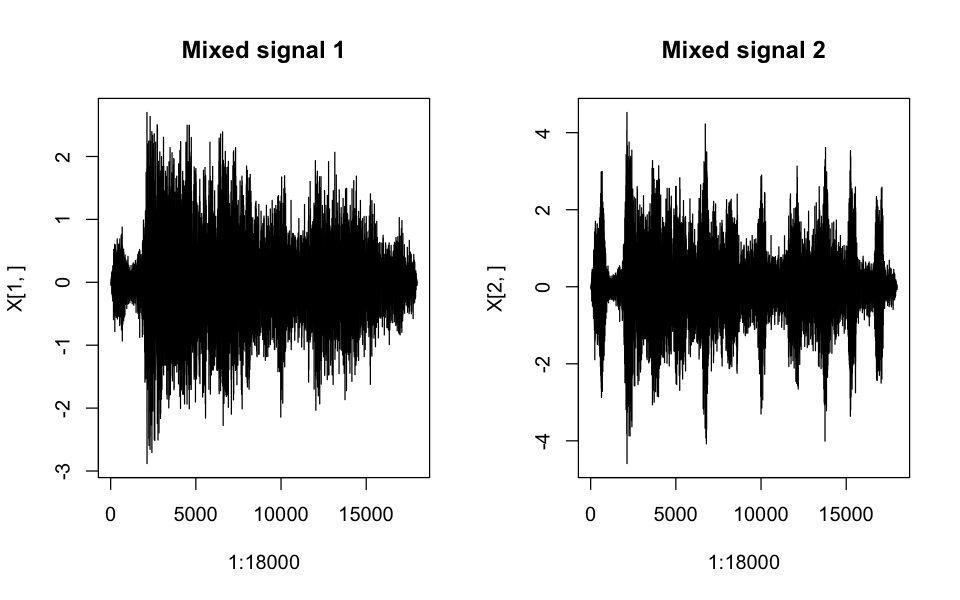

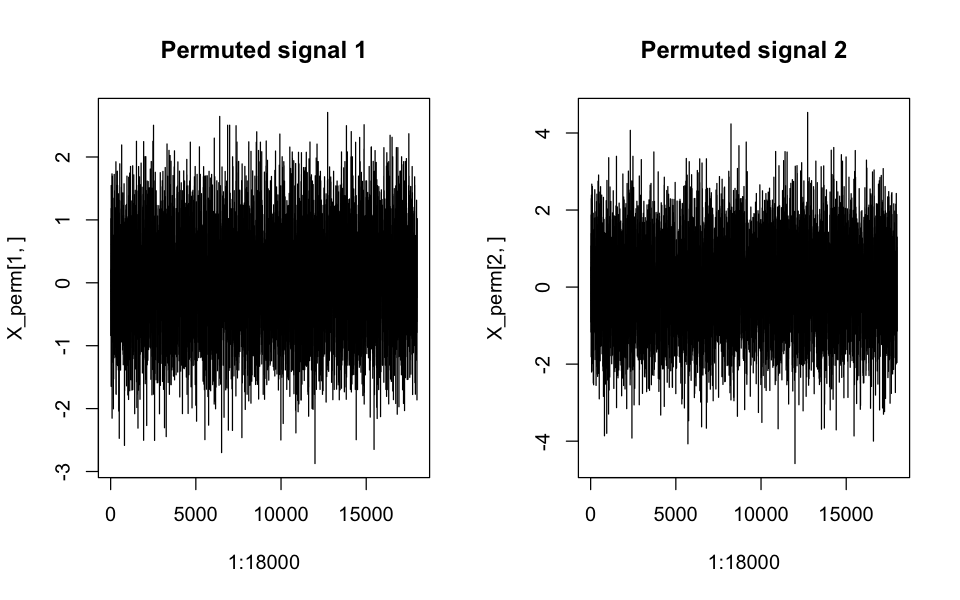

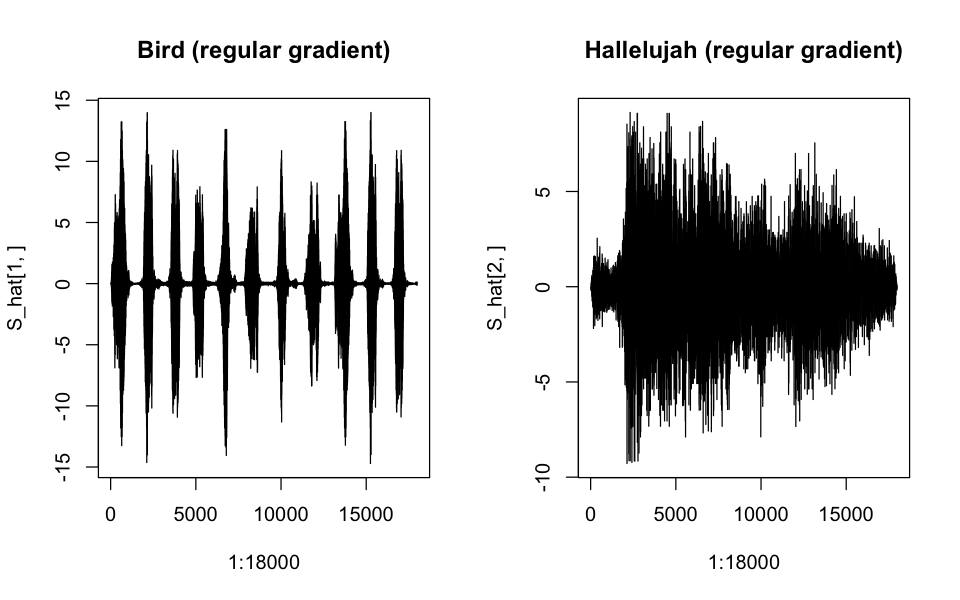

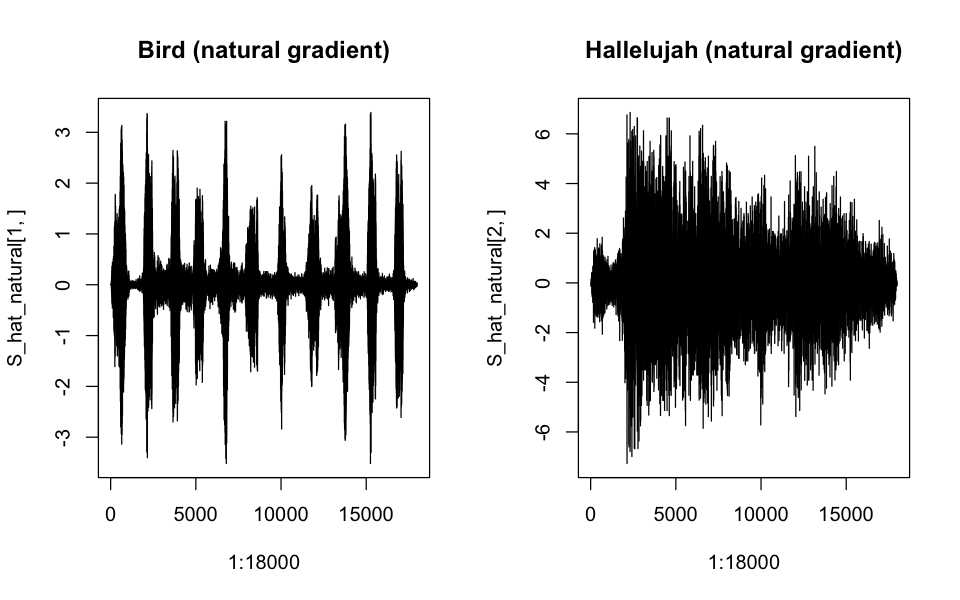

In [53]:
# Ex. 3 -------------------------------------------------------------------

# a)

options(repr.plot.width=8, repr.plot.height=5)

par(mfrow = c(1,2))

# original sounds

plot(1:18000, s1$V1, type = 'l', main = "Bird (original)")
plot(1:18000, s2$V1, type = 'l', main = "Hallelujah (original)")
#play(audioSample(t(as.matrix(s1)), rate = 8192))
#play(audioSample(t(as.matrix(s2)), rate = 8192))

# mixed

plot(1:18000, X[1,], type = 'l', main = "Mixed signal 1")
plot(1:18000, X[2,], type = 'l', main = "Mixed signal 2")
#play(audioSample(t(as.matrix(X[1,])), rate = 8192))
#play(audioSample(t(as.matrix(X[2,])), rate = 8192))

# permuted

plot(1:18000, X_perm[1,], type = 'l', main = "Permuted signal 1")
plot(1:18000, X_perm[2,], type = 'l', main = "Permuted signal 2")
#play(audioSample(t(as.matrix(X_perm[1,])), rate = 8192))
#play(audioSample(t(as.matrix(X_perm[2,])), rate = 8192))

# recovered

# regular
plot(1:18000, S_hat[1,], type = 'l', main = "Bird (regular gradient)")
plot(1:18000, S_hat[2,], type = 'l', main = "Hallelujah (regular gradient)")
#play(audioSample(t(as.matrix(S_hat[1,])), rate = 8192))
#play(audioSample(t(as.matrix(S_hat[2,])), rate = 8192))

# natural 
plot(1:18000, S_hat_natural[1,], type = 'l', main = "Bird (natural gradient)")
plot(1:18000, S_hat_natural[2,], type = 'l', main = "Hallelujah (natural gradient)")
#play(audioSample(t(as.matrix(S_hat_natural[1,])), rate = 8192))
#play(audioSample(t(as.matrix(S_hat_natural[2,])), rate = 8192))


In [54]:
# b)

# recovered sources (regular gradient) vs. original sources
cor(t(S_hat), t(S))

# recovered sources (natural gradient) vs. original sources
cor(t(S_hat_natural), t(S))

V1,V1.1
0.9998798,-0.01424565
0.0190292,0.99984212


V1,V1.1
0.9836050,-0.1790966
0.1138342,0.9936425


1,0
0,1


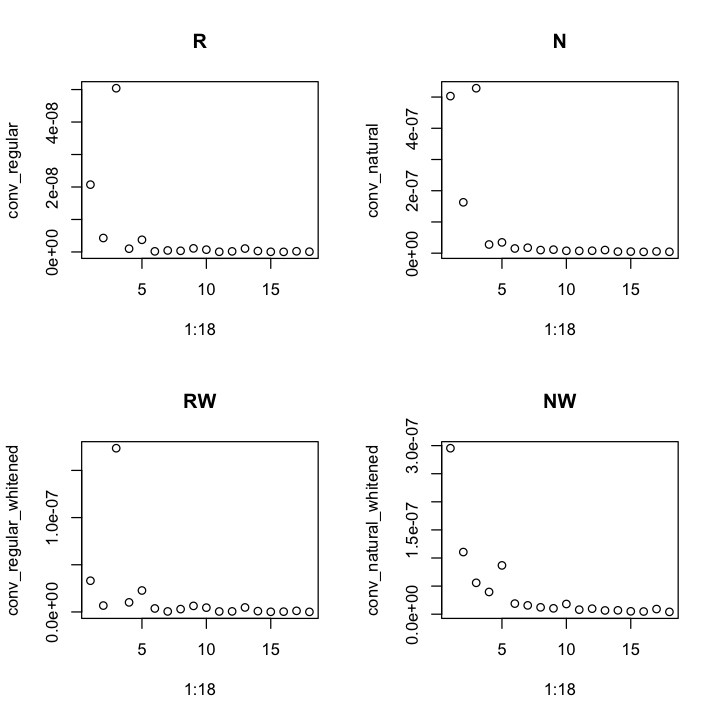

In [55]:
# c)

convergence_speed_regular = function(W, X, n_steps = 18000){
    c_rate = c()
    for(t in 1:n_steps){
        eta_t = eta_zero/t
        
        x = X[,alpha]
        
        W_inv = t(solve(W))
        
        f_wx = 1 - 2*f(W%*%cbind(x,x))
        
        W_delta = eta_t*(W_inv + f_wx*t(cbind(x,x)))
        
        W = W + W_delta

        if(t %% 1000 == 0){
            c_rate = c(c_rate, sum(W_delta^2))
        }
        
        alpha = alpha + 1
        if(alpha == ncol(X)){
            alpha = 1
        }
    }
    return(c_rate)
}




convergence_speed_natural = function(W, X, n_steps = 18000){
    
    c_rate = c()
    for(t in 1:n_steps){
        eta_t = eta_zero/t
        
        x = X[,alpha]
        
        f_wx = 1 - 2*f(W%*%cbind(x,x))
        
        wx = W%*%cbind(x,x)
        
        k_delta = matrix(c(1,0,0,1), ncol = 2)
        
        
        W_delta = eta_t*((k_delta + f_wx%*%wx)%*%W)
        
        W = W + W_delta
        
        if(t %% 1000 == 0){
            c_rate = c(c_rate, sum(W_delta^2))
        }
        
        alpha = alpha + 1
        if(alpha == ncol(X)){
            alpha = 1
        }
    }
    return(c_rate)
}


evec = eigen(cov(t(X)))$vectors
evals = eigen(cov(t(X)))$values

X_whitened_t = t(X) %*% evec %*% diag((evals)^-0.5)
round(cor(X_whitened_t), 5)

X_whitened = t(X_whitened_t)

conv_regular = convergence_speed_regular(W1, X, n_steps = 18000)
conv_natural = convergence_speed_natural(W2, X, n_steps = 18000)
conv_regular_whitened = convergence_speed_regular(W1, X_whitened, n_steps = 18000)
conv_natural_whitened = convergence_speed_natural(W2, X_whitened, n_steps = 18000)

options(repr.plot.width=6, repr.plot.height=6)

par(mfrow = c(2,2))
plot(1:18, conv_regular, main = 'R')
plot(1:18, conv_natural, main = 'N')
plot(1:18, conv_regular_whitened, main = 'RW')
plot(1:18, conv_natural_whitened, main = 'NW')

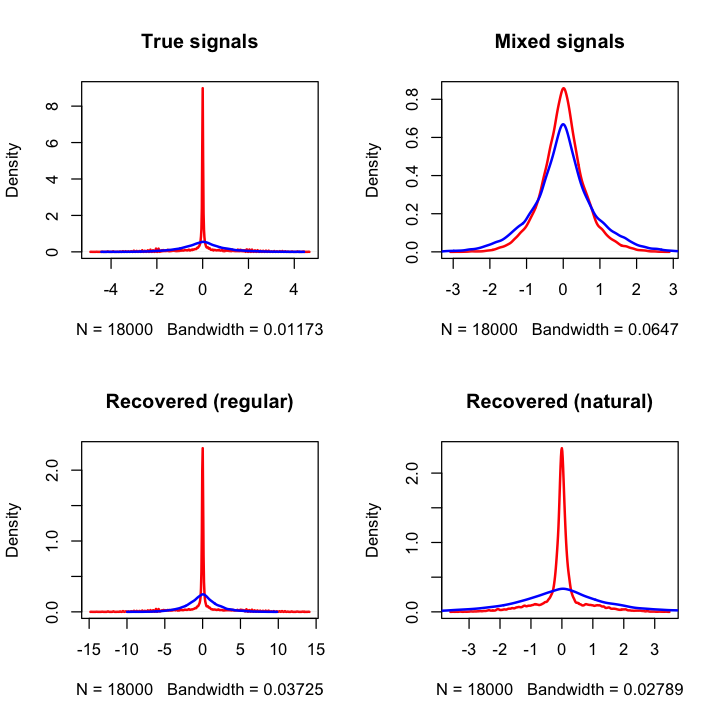

In [56]:
# d)

par(mfrow = c(2,2))

# true signals
plot(density(s1$V1), main = 'True signals', lwd = 2, col = 2)
lines(density(s2$V1), lwd = 2, col = 4)

#mixed
plot(density(X[1,]), main = 'Mixed signals', lwd = 2, col = 2)
lines(density(X[2,]), lwd = 2, col = 4)

# unmixed

# regular
plot(density(S_hat[1,]), main = 'Recovered (regular)', lwd = 2, col = 2)
lines(density(S_hat[2,]), lwd = 2, col = 4)

# natural
plot(density(S_hat_natural[1,]), main = 'Recovered (natural)', lwd = 2, col = 2)
lines(density(S_hat_natural[2,]), lwd = 2, col = 4)



par(mfrow = c(1,1))